In [1]:
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from datetime import datetime, timedelta
import pandas as pd

# Authenticate with NASA Earthdata
earthaccess.login()

In [2]:
# Open the PACE OCI L3b granule
granule = earthaccess.open(
    granules=["https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250927.L3m.DAY.FLH.V3_1.nflh.0p1deg.nc"]
)

# Open the dataset
ds = xr.open_dataset(granule[0])

# Print available variables to check what's in the dataset
print("Available variables:", list(ds.variables.keys()))
print("\nDataset structure:")
print(ds)

# Extract nFLH variable (adjust based on actual variable name)
# For L3b binned data, you may need to extract from specific groups
if 'nflh' in ds:
    nflh = ds['nflh']
elif 'chlor_a' in ds:  # If nflh not available, using chlor_a as example
    nflh = ds['chlor_a']
else:
    # Check for other possible variable names
    print("\nPlease specify the correct variable name from the list above")

# For L3b binned data, you'll need to work with bin indices
# Convert binned data to lat/lon grid
lat = ds['lat'].values if 'lat' in ds else None
lon = ds['lon'].values if 'lon' in ds else None

# If binned format, may need to grid the data first
if lat is None or lon is None:
    print("\nThis is binned L3b data. Converting to grid...")
    # Use bin_index to create grid
    bin_index = ds['bin_index'].values if 'bin_index' in ds else None

# Mask invalid values
nflh_masked = np.ma.masked_invalid(nflh)


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Available variables: ['nflh', 'lat', 'lon', 'palette']

Dataset structure:
<xarray.Dataset> Size: 26MB
Dimensions:  (lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    nflh     (lat, lon) float32 26MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20250927.L3m.DAY.FLH.V3_1.nfl...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/

In [48]:
# open ocean sample
granule_name1 = earthaccess.open(
    granules=["https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250927T220954.L2.OC_AOP.V3_1.nc"]
)
# open the granule using xarray
datatree1 = xr.open_datatree(granule_name1[0])
ds1       = xr.merge(datatree1.to_dict().values())
lat1  = ds1['latitude'].values
lon1  = ds1['longitude'].values
# print the corner of the lat and lon
lat1_corners = [lat1[0,0], lat1[0,-1], lat1[-1,0], lat1[-1,-1]]
lon1_corners = [lon1[0,0], lon1[0,-1], lon1[-1,0], lon1[-1,-1]]
print("Open ocean lat corners:", lat1_corners)
print("Open ocean lon corners:", lon1_corners)
# reorganize to the bounds
box1 = [
    [lon1_corners[0], lat1_corners[0]],
    [lon1_corners[1], lat1_corners[1]],
    [lon1_corners[3], lat1_corners[3]],
    [lon1_corners[2], lat1_corners[2]],
    [lon1_corners[0], lat1_corners[0]],
]
# close
ds1.close()


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Open ocean lat corners: [np.float32(-21.580723), np.float32(-16.395742), np.float32(-3.67091), np.float32(1.3329954)]
Open ocean lon corners: [np.float32(-147.66516), np.float32(-122.54455), np.float32(-150.64647), np.float32(-127.06447)]


In [39]:
# coastal area sample
granule_name2 = earthaccess.open(
    granules=["https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250927T123954.L2.OC_AOP.V3_1.nc"]
)
# open the granule using xarray
datatree2 = xr.open_datatree(granule_name2[0])
ds2       = xr.merge(datatree2.to_dict().values())
lat2  = ds2['latitude'].values
lon2  = ds2['longitude'].values
# print the corner of the lat and lon
lat2_corners = [lat2[0,0], lat2[0,-1], lat2[-1,0], lat2[-1,-1]]
lon2_corners = [lon2[0,0], lon2[0,-1], lon2[-1,0], lon2[-1,-1]]
print("Coastal area lat corners:", lat2_corners)
print("Coastal area lon corners:", lon2_corners)
# reorganize to the bounds
box2 = [
    [lon2_corners[0], lat2_corners[0]],
    [lon2_corners[1], lat2_corners[1]],
    [lon2_corners[3], lat2_corners[3]],
    [lon2_corners[2], lat2_corners[2]],
    [lon2_corners[0], lat2_corners[0]],
]
# close
ds2.close()


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Coastal area lat corners: [np.float32(53.20355), np.float32(60.28384), np.float32(66.27019), np.float32(77.58875)]
Coastal area lon corners: [np.float32(-28.572456), np.float32(14.814775), np.float32(-55.389736), np.float32(23.88697)]


In [40]:
ds2

<xarray.Dataset> Size: 3GB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 172, number_of_lines: 1710,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 1kB 346.0 348.0 351.0 ... 717.0 719.0
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/32)
    wavelength     (number_of_bands) float64 2kB ...
    vcal_gain      (number_of_reflective_bands) float32 1kB ...
    vcal_offset    (number_of_reflective_bands) float32 1kB ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    ...             ...
    avw            (number_of_lines, pixels_per_line) float32 9MB ...
    nflh           (number_of_lines, pixels_per_line) float32 9MB ...
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB ...
    longitude      (number_of_lines, pixels_per_line) float32 9MB -28.57 ... ...
    latitude       (number_of_lines, pixels_per_line) float32 9MB 53.2 ... 77.59
    tilt           (number_of_lines) float32 7kB ...
Attributes: (12/47)
    title:                             OCI Level-2 Data AOP
    product_name:                      PACE_OCI.20250927T123954.L2.OC_AOP.V3_...
    processing_version:                3.1
    history:                           l2gen par=/data4/sdpsoper/vdc/vpu3/wor...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_min:                14.814775
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9954973459243774
    geospatial_bounds:                 POLYGON((14.81478 60.28384, -28.57246 ...

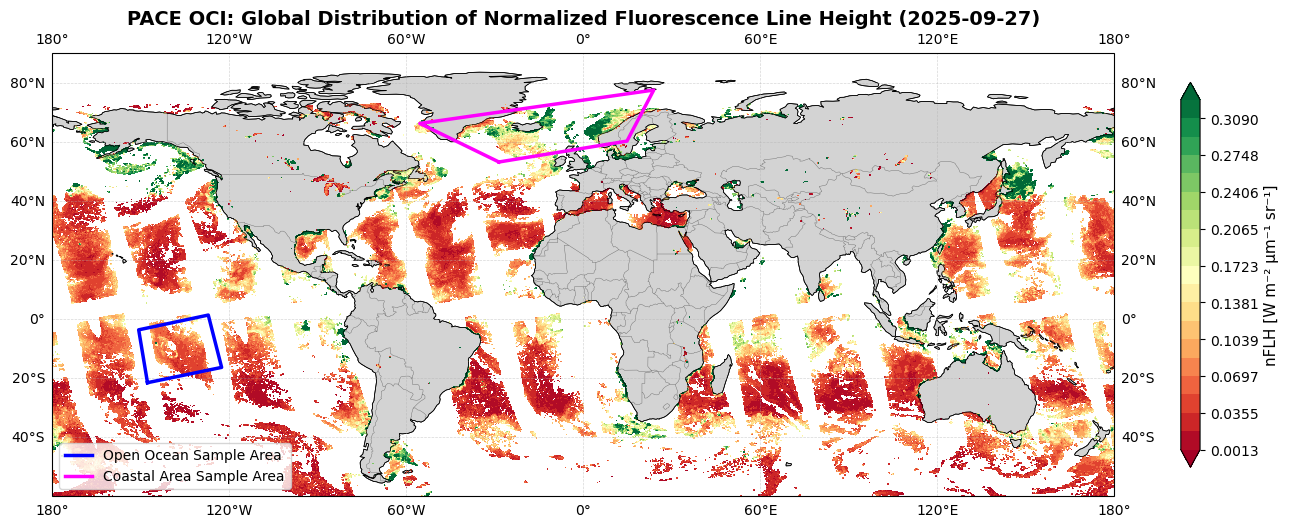

In [41]:
# Create figure with PlateCarree projection
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')

# Set global extent
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())

# Plot nFLH data using contourf
levels = np.linspace(np.nanpercentile(nflh, 2), np.nanpercentile(nflh, 98), 20)
im = ax.contourf(lon, lat, nflh_masked, 
                 levels=levels,
                 transform=ccrs.PlateCarree(),
                 cmap='RdYlGn',
                 extend='both')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', 
                    pad=0.05, shrink=0.5, extend='both')
cbar.set_label('nFLH [W m⁻² μm⁻¹ sr⁻¹]', 
               fontsize=11)

# draw box boundary for open ocean sample
box1_lon, box1_lat = zip(*box1)
ax.plot(box1_lon, box1_lat, color='blue', linewidth=2.5, 
        transform=ccrs.PlateCarree(), label='Open Ocean Sample Area')
ax.legend(loc='lower left', fontsize=10)
# coastal area sample

box2_lon, box2_lat = zip(*box2)
ax.plot(box2_lon, box2_lat, color='magenta', linewidth=2.5, 
        transform=ccrs.PlateCarree(), label='Coastal Area Sample Area')
ax.legend(loc='lower left', fontsize=10)

# Set title
plt.title('PACE OCI: Global Distribution of Normalized Fluorescence Line Height (2025-09-27)',
          fontsize=14, fontweight='bold')

plt.tight_layout()

# Close dataset
ds.close()

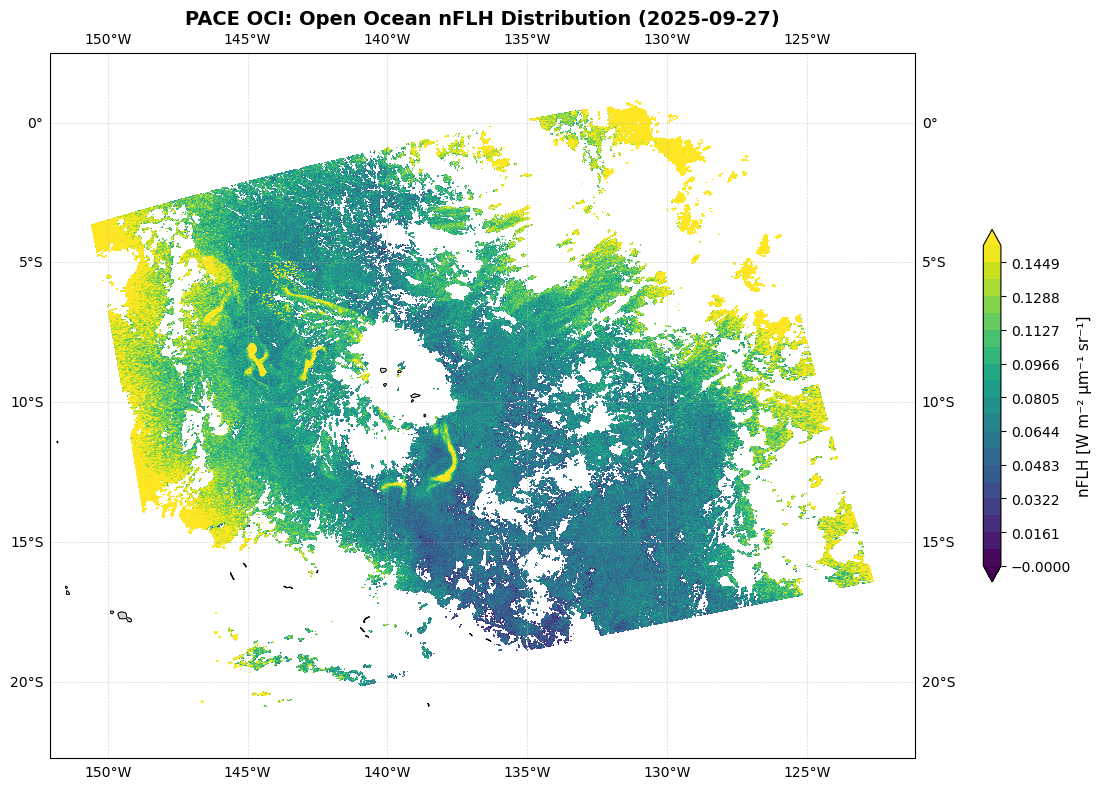

In [49]:
# open ocean granule map - data already loaded as ds1
# Create figure with PlateCarree projection
fig2 = plt.figure(figsize=(14, 8))
ax2 = plt.axes(
    projection=ccrs.PlateCarree()
    )
# Add map features
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
# Plot nflh data using contourf
nflh1 = ds1['nflh'].values
nflh1_masked = np.ma.masked_invalid(nflh1)
levels2 = np.linspace(np.nanpercentile(nflh1, 2), np.nanpercentile(nflh1, 98), 20)
im2 = ax2.contourf(lon1, lat1, nflh1_masked, 
                   levels=levels2,
                   transform=ccrs.PlateCarree(),
                   cmap='viridis',
                   extend='both')
# Add colorbar
cbar2 = plt.colorbar(im2, ax=ax2, orientation='vertical', 
                     pad=0.05, shrink=0.5, extend='both')
cbar2.set_label('nFLH [W m⁻² μm⁻¹ sr⁻¹]',
                     fontsize=11)
# Set title
plt.title('PACE OCI: Open Ocean nFLH Distribution (2025-09-27)',
          fontsize=14, fontweight='bold')
plt.tight_layout()


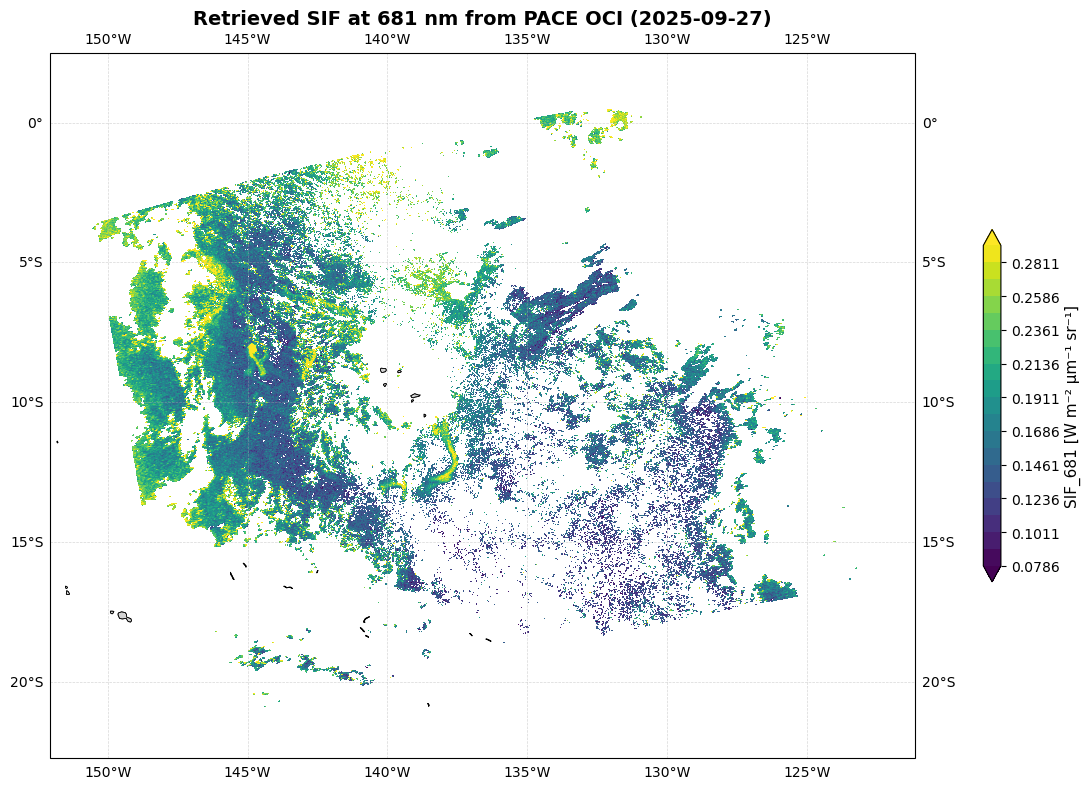

In [51]:
# load /home/zhe2/FraLab/PACE_redSIF_PACE/global_fit/gridded_output/retrieved_SIF_681_20250927T123954.nc
# open the granule using xarray
ds3 = xr.open_dataset("/home/zhe2/FraLab/PACE_redSIF_PACE/global_fit/gridded_output/retrieved_SIF_681_20250927T220954.nc")
lat3 = ds3['latitude'].values
lon3 = ds3['longitude'].values
sif3 = ds3['SIF_681'].values
sif3_masked = np.ma.masked_invalid(sif3)
# Create figure with PlateCarree projection
fig3 = plt.figure(figsize=(14, 8))
ax3 = plt.axes(projection=ccrs.PlateCarree())
# Add map features
ax3.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax3.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax3.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
ax3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
# Plot SIF data using contourf
levels3 = np.linspace(np.nanpercentile(sif3, 2), np.nanpercentile(sif3, 98), 20)
im3 = ax3.contourf(lon3, lat3, sif3_masked, 
                   levels=levels3,
                   transform=ccrs.PlateCarree(),
                   cmap='viridis',
                   extend='both')
# Add colorbar
cbar3 = plt.colorbar(im3, ax=ax3, orientation='vertical', 
                     pad=0.05, shrink=0.5, extend='both')
cbar3.set_label('SIF_681 [W m⁻² μm⁻¹ sr⁻¹]',
                        fontsize=11)
# Set title
plt.title('Retrieved SIF at 681 nm from PACE OCI (2025-09-27)',
          fontsize=14, fontweight='bold')
plt.tight_layout()


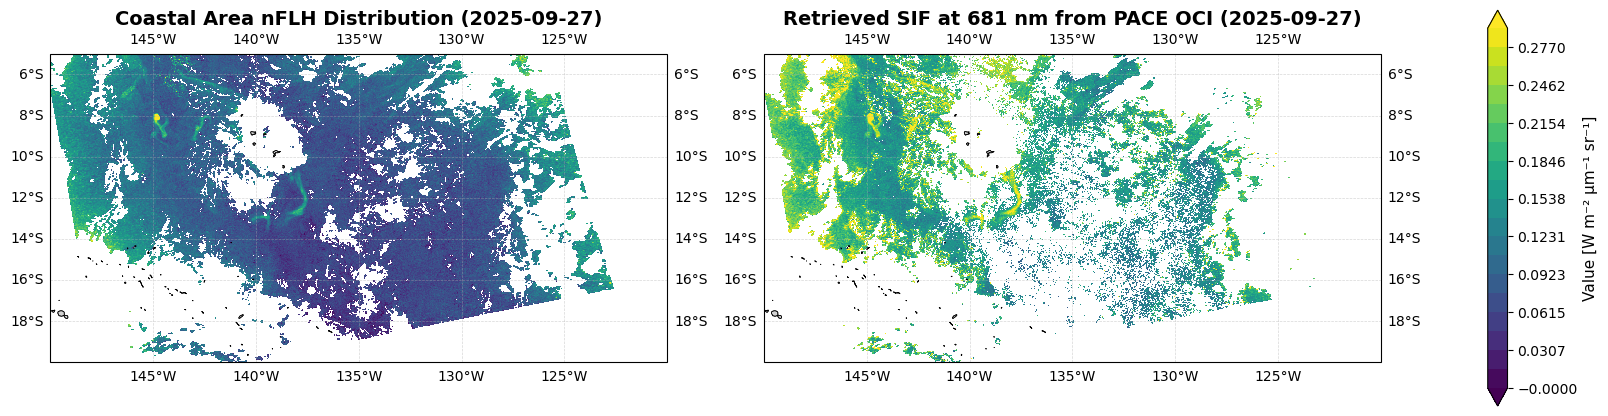

In [55]:
# 2x1 subplots: zooming into coastal area
cmap = "viridis"
levels4_min = min(np.nanpercentile(nflh1, 2), np.nanpercentile(sif3, 2))
levels4_max = max(np.nanpercentile(nflh1, 98), np.nanpercentile(sif3, 98))
levels4 = np.linspace(levels4_min, levels4_max, 20)
# longitude bounds [0, 20], latitude bounds [60, 67]
fig4, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(16, 8), 
                                  subplot_kw={'projection': ccrs.PlateCarree()},
                                  layout="constrained")
# Add map features to both subplots
for ax in [ax4a, ax4b]:
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
# Set extent to coastal area for both subplots
extent = [-150, -120, -20, -5]
ax4a.set_extent(extent, crs=ccrs.PlateCarree())
ax4b.set_extent(extent, crs=ccrs.PlateCarree())
# nFLH
im4a = ax4a.contourf(lon1, lat1, nflh1_masked, 
                     levels=levels4,
                     transform=ccrs.PlateCarree(),
                     cmap=cmap,
                     extend='both')
ax4a.set_title('Coastal Area nFLH Distribution (2025-09-27)', fontsize=14, fontweight='bold')
# Plot SIF data on right subplot
im4b = ax4b.contourf(lon3, lat3, sif3_masked, 
                     levels=levels4,
                     transform=ccrs.PlateCarree(),
                     cmap=cmap,
                     extend='both')
ax4b.set_title('Retrieved SIF at 681 nm from PACE OCI (2025-09-27)', fontsize=14, fontweight='bold')

# Add shared colorbar
cbar = fig4.colorbar(im4a, ax=[ax4a, ax4b], orientation='vertical', pad=0.05, shrink=0.5)
cbar.set_label('Value [W m⁻² μm⁻¹ sr⁻¹]', fontsize=11)



ValueError: x and y must be the same size

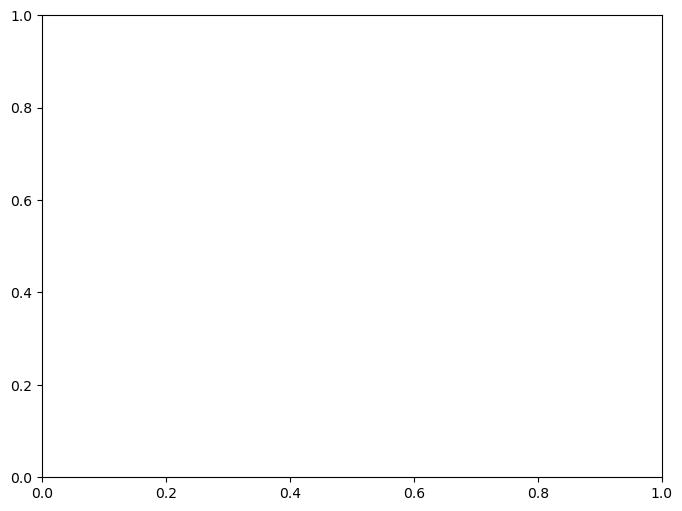

In [62]:
# Choose which nFLH data to compare with SIF_681
# Uncomment one of the following lines:
# nflh_data = nflh1_masked  # Option 1: Use nflh1
nflh_data = nflh1_masked  # Option 2: Use nflh2

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(nflh_data.compressed(), sif3_masked.compressed(), alpha=0.5, edgecolor='k', linewidth=0.5)

# Add 1:1 line
min_val = min(np.nanmin(nflh_data), np.nanmin(sif3_masked))
max_val = max(np.nanmax(nflh_data), np.nanmax(sif3_masked))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='1:1 Line')

# Add labels and title
plt.xlabel('nFLH [W m⁻² μm⁻¹ sr⁻¹]', fontsize=12)
plt.ylabel('SIF_681 [W m⁻² μm⁻¹ sr⁻¹]', fontsize=12)
plt.title('Scatter Plot of SIF_681 vs. nFLH', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
